In [1]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model

#from google.colab import drive
#drive.mount('/content/gdrive', force_remount=True)
#"/content/gdrive/My Drive/101_ObjectCategories/airplanes/image_0019.jpg"

Using TensorFlow backend.


In [2]:
!echo "Downloading 101_Object_Categories for image notebooks"
!curl -L -o 101_ObjectCategories.tar.gz --progress-bar http://www.vision.caltech.edu/Image_Datasets/Caltech101/101_ObjectCategories.tar.gz
!tar -xzf 101_ObjectCategories.tar.gz
!rm 101_ObjectCategories.tar.gz
!ls

######################################################################### 100.0%                                                 6.0%                               9.0%                                            27.4%############                                       50.5%###########################                     74.6%###################              84.5%####################         91.7%
101_ObjectCategories			GLOW.ipynb
Bigan_3.py				graph_optimized.pb
BigGAN.ipynb				graph_unoptimized.pb
BigGAN.py				movie.mov
blocksparse-1.0.0-py2.py3-none-any.whl	myMovie5.mov
caltech101.tar.gz			reverse_image_VAE.ipynb
checkpoints				Reverse_VAE.ipynb
fashion-mnist.annoy.index		shape_predictor_68_face_landmarks.dat
frame_00001.png				video209.mov
glow					z_manipulate.npy


In [3]:
model = keras.applications.VGG16(weights='imagenet', include_top=True)


In [4]:
model.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:
!ls 101_ObjectCategories

accordion	   cougar_body	    garfield	  menorah     snoopy
airplanes	   cougar_face	    gerenuk	  metronome   soccer_ball
anchor		   crab		    gramophone	  minaret     stapler
ant		   crayfish	    grand_piano   Motorbikes  starfish
BACKGROUND_Google  crocodile	    hawksbill	  nautilus    stegosaurus
barrel		   crocodile_head   headphone	  octopus     stop_sign
bass		   cup		    hedgehog	  okapi       strawberry
beaver		   dalmatian	    helicopter	  pagoda      sunflower
binocular	   dollar_bill	    ibis	  panda       tick
bonsai		   dolphin	    inline_skate  pigeon      trilobite
brain		   dragonfly	    joshua_tree   pizza       umbrella
brontosaurus	   electric_guitar  kangaroo	  platypus    watch
buddha		   elephant	    ketch	  pyramid     water_lilly
butterfly	   emu		    lamp	  revolver    wheelchair
camera		   euphonium	    laptop	  rhino       wild_cat
cannon		   ewer		    Leopards	  rooster     windsor_chair
car_side	   Faces	    llama	  saxophone   wrench
ceiling_fan	   Faces_e

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def load_image(path):
    img = image.load_img(path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

shape of x:  (1, 224, 224, 3)
data type:  float32


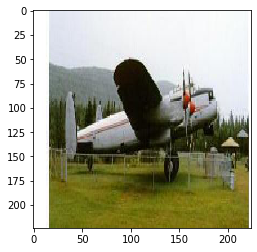

In [7]:
img, x = load_image("101_ObjectCategories/airplanes/image_0011.jpg")
print("shape of x: ", x.shape)
print("data type: ", x.dtype)
plt.imshow(img)

In [8]:
# forward the image through the network
predictions = model.predict(x)

# print out the 
for _, pred, prob in decode_predictions(predictions)[0]:
    print("predicted %s with probability %0.3f" % (pred, prob))

predicted missile with probability 0.157
predicted warplane with probability 0.144
predicted wing with probability 0.102
predicted projectile with probability 0.074
predicted cannon with probability 0.054


In [9]:
feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)
feat_extractor.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [12]:
images_path = '101_ObjectCategories'
image_extensions = ['.jpg', '.png', '.jpeg']   # case-insensitive (upper/lower doesn't matter)
max_num_images = 10000

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]
if max_num_images < len(images):
    images = [images[i] for i in sorted(random.sample(xrange(len(images)), max_num_images))]

print("keeping %d images to analyze" % len(images))

keeping 9144 images to analyze


In [13]:
import time
tic = time.clock()


features = []
for i, image_path in enumerate(images):
    if i % 500 == 0:
        toc = time.clock()
        elap = toc-tic;
        print("analyzing image %d / %d. Time: %4.4f seconds." % (i, len(images),elap))
        tic = time.clock()
    img, x = load_image(image_path);
    feat = feat_extractor.predict(x)[0]
    features.append(feat)

print('finished extracting features for %d images' % len(images))

analyzing image 0 / 9144. Time: 0.0058 seconds.
analyzing image 500 / 9144. Time: 352.0159 seconds.
analyzing image 1000 / 9144. Time: 368.4969 seconds.
analyzing image 1500 / 9144. Time: 352.8744 seconds.
analyzing image 2000 / 9144. Time: 338.2581 seconds.
analyzing image 2500 / 9144. Time: 338.3002 seconds.
analyzing image 3000 / 9144. Time: 338.4520 seconds.
analyzing image 3500 / 9144. Time: 358.1189 seconds.
analyzing image 4000 / 9144. Time: 338.7372 seconds.
analyzing image 4500 / 9144. Time: 337.7580 seconds.
analyzing image 5000 / 9144. Time: 336.5552 seconds.
analyzing image 5500 / 9144. Time: 338.1093 seconds.
analyzing image 6000 / 9144. Time: 338.3570 seconds.
analyzing image 6500 / 9144. Time: 338.4204 seconds.
analyzing image 7000 / 9144. Time: 338.3218 seconds.
analyzing image 7500 / 9144. Time: 338.4333 seconds.
analyzing image 8000 / 9144. Time: 338.1902 seconds.
analyzing image 8500 / 9144. Time: 338.2966 seconds.
analyzing image 9000 / 9144. Time: 339.0322 seconds.

In [14]:
from sklearn.decomposition import PCA

features = np.array(features)
pca = PCA(n_components=300)
pca.fit(features)

PCA(copy=True, iterated_power='auto', n_components=300, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [15]:
pca_features = pca.transform(features)


In [16]:
len(pca_features)

9144

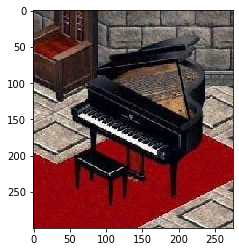

In [17]:
import random

# grab a random query image
query_image_idx = int(len(images) * random.random())

# let's display the image
img = image.load_img(images[query_image_idx])
plt.imshow(img)

In [18]:
from scipy.spatial import distance

similar_idx = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]

In [19]:
idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:6]

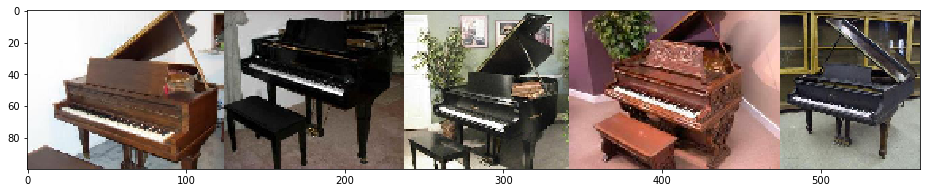

In [20]:
# load all the similarity results as thumbnails of height 100
thumbs = []
for idx in idx_closest:
    img = image.load_img(images[idx])
    img = img.resize((int(img.width * 100 / img.height), 100))
    thumbs.append(img)

# concatenate the images into a single image
concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)

# show the image
plt.figure(figsize = (16,12))
plt.imshow(concat_image)

In [21]:
def get_closest_images(query_image_idx, num_results=5):
    distances = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:num_results+1]
    return idx_closest

def get_concatenated_images(indexes, thumb_height):
    thumbs = []
    for idx in indexes:
        img = image.load_img(images[idx])
        img = img.resize((int(img.width * thumb_height / img.height), thumb_height))
        thumbs.append(img)
    concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
    return concat_image

Text(0.5, 1.0, 'result images')

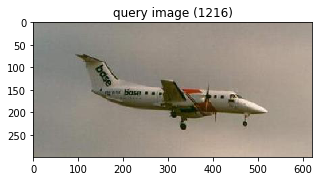

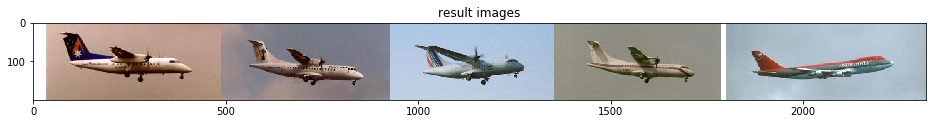

In [22]:
# do a query on a random image
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)

# display the query image
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title("query image (%d)" % query_image_idx)

# display the resulting images
plt.figure(figsize = (16,12))
plt.imshow(results_image)
plt.title("result images")

Text(0.5, 1.0, 'result images')

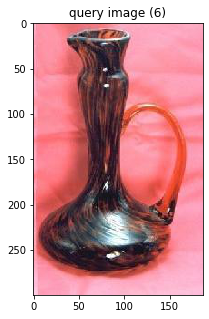

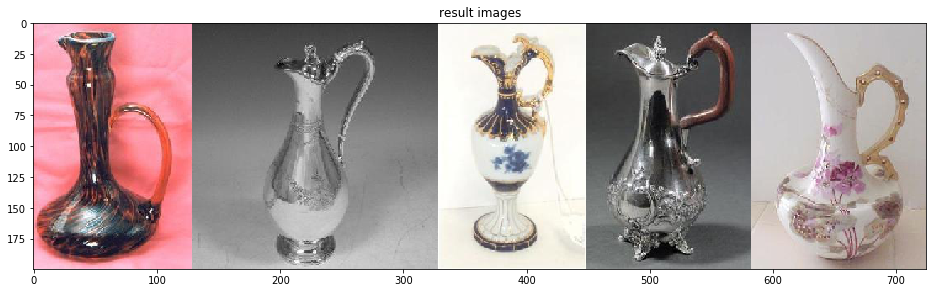

In [23]:
# do a query on a random image
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)

# display the query image
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title("query image (%d)" % query_image_idx)

# display the resulting images
plt.figure(figsize = (16,12))
plt.imshow(results_image)
plt.title("result images")